# 6. VIENNA cohort: all parameters, all standard parameters - evaluate parameter sets performance (100 CVs)

- load more detailed dataset with the VIENNA patients only but including all parameters from the VICIS study
- run 100 CVs for different models and these parameter sets:
    - All parameters (including etiology)
    - All parameters (excluding etiology)
    - All standard workup parameters
    - 5-AP model = advanced parameters (PLT, BILI, ELF, HISTAMINE, GGT)
    - 3-AP model = advanced parameters (PLT, BILI, ELF)
  


<sub>original notebook name: `VICIS_18_VIENNA_data_CVs_models_rerun.ipynb`</sub>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# prediction models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve

# plotting configuration
from matplotlib import rc_params
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Helvetica'

import HVPG16_functions

In [2]:
output_plots_path = "/Users/jreinis/OneDrive/Rotation/rotation/HVPG16_manuscript_figures/models_performance_comparison/"
output_AUCs_path = "/Users/jreinis/OneDrive/Rotation/rotation/results_CVs_AUCs/"

### Load VICIS data (from December 2020, kNN-imputed missing values, all parameters)

In [3]:
# kNN imputed data
data = pd.read_pickle("../preprocessed/VICIS_CeMM_preprocessed_v3_kNN_imputed.pickle").reset_index(drop=True)

## hotfix for having two columns named chol(one etiology = 10, one for cholesterol measurement = 61)
colnames = list(data.columns)
colnames[10] = "CHOL_ETIO"
data.columns = colnames

# add dataset info and move to the front, along with HVPG
data["dataset"] = "VIENNA"
front_cols = ["dataset", "HVPG"]
data = data[front_cols + [column for column in data.columns if column not in front_cols]]

# drop metadata columns
columns_drop = ["DATE HVPG", "SEX", "ETIO", "HVPG_label", "HVPG_label_code"]
data.drop(columns = columns_drop, inplace=True)

### Do cross-validations

In [4]:
models = [LogisticRegression(C = 1, max_iter=15000, warm_start=False),
          MLPClassifier(hidden_layer_sizes=(20,20,20,), max_iter=2000, warm_start=False, alpha=.001),
          RandomForestClassifier(n_estimators = 100, warm_start=False),
          SVC(kernel='rbf', C = 0.8, probability=True),
          XGBClassifier(n_estimators = 100, verbosity = 0)]
names = ["Logistic Reg", "MLP", "Random Forest", "SVM", "XGBoost"]

n_cv = 100

#### All parameters (including etiology)

In [5]:
variables, cohort, title = list(data.columns[2:]), "VIENNA", "All parameters + ETIO"

91 variables (ALD, VIRAL, MIX, NASH, CHOL_ETIO, OTHER, SEX_Code, AGE, BL_STIFFNESS, MELD-UNOS, BL_BMI, HR, SYS, DIA, MAP, ERY, HB, HKT, MCV, MCH, MCHC, ERY-DISTRIBUTION, PLT, MPLTV, WBC, Na, K, Cl, Ca, Ph, Mg, KREA, BUN, BILI, PROTEIN, ALB, CHE, AP, ASAT, ALAT, GGT, LDH, aPTT, FGEN, INR, TPZ%, D-Dim, vWF_Ag, PT_F1,2, PFA100_EPI, Pro_C_Act, Pro_S_Imm, AT-III_Act, BA, TRIG, CHOL, GLUC, HDL, LDL, Fe, TF, TFS, FERRITIN, sTFR, NH3, CRP, IL6, LBP, PCT, TSH, 25(OH)D, LH, FSH, PRL, TEST, BA-TEST, SHBG, SFLT1, PLGF, SFLT1/PLGF_Q, proBNP, COPEPTIN-ADH, RENIN, INS, SEROTONIN, HISTAMINE, ELF, EPO, TPO, VIT_A, VIT_E), VIENNA cohort(s), 131 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            **************************************

,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.778207,0.007524,0.784314,0.007524
1,MLP,0.653635,0.010223,0.660131,0.010223
2,Random Forest,0.832670,0.006146,0.836511,0.006146
3,SVM,0.728104,0.008113,0.730211,0.008113
4,XGBoost,0.792635,0.006711,0.797386,0.006711


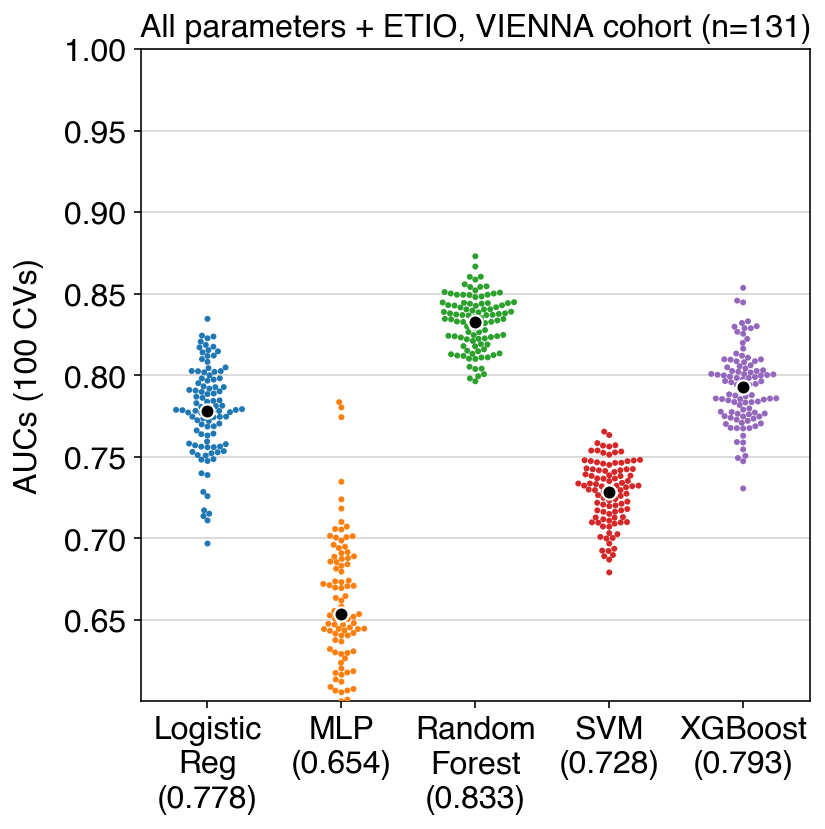

In [6]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### All parameters (excluding etiology)

In [7]:
variables, cohort, title = list(data.columns[8:]), "VIENNA", "All parameters"

85 variables (SEX_Code, AGE, BL_STIFFNESS, MELD-UNOS, BL_BMI, HR, SYS, DIA, MAP, ERY, HB, HKT, MCV, MCH, MCHC, ERY-DISTRIBUTION, PLT, MPLTV, WBC, Na, K, Cl, Ca, Ph, Mg, KREA, BUN, BILI, PROTEIN, ALB, CHE, AP, ASAT, ALAT, GGT, LDH, aPTT, FGEN, INR, TPZ%, D-Dim, vWF_Ag, PT_F1,2, PFA100_EPI, Pro_C_Act, Pro_S_Imm, AT-III_Act, BA, TRIG, CHOL, GLUC, HDL, LDL, Fe, TF, TFS, FERRITIN, sTFR, NH3, CRP, IL6, LBP, PCT, TSH, 25(OH)D, LH, FSH, PRL, TEST, BA-TEST, SHBG, SFLT1, PLGF, SFLT1/PLGF_Q, proBNP, COPEPTIN-ADH, RENIN, INS, SEROTONIN, HISTAMINE, ELF, EPO, TPO, VIT_A, VIT_E), VIENNA cohort(s), 131 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            *******************************************************************************

,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.777376,0.007894,0.784314,0.007894
1,MLP,0.646077,0.010522,0.641975,0.010522
2,Random Forest,0.827416,0.006518,0.830065,0.006518
3,SVM,0.729348,0.008296,0.738562,0.008296
4,XGBoost,0.791930,0.006907,0.790850,0.006907


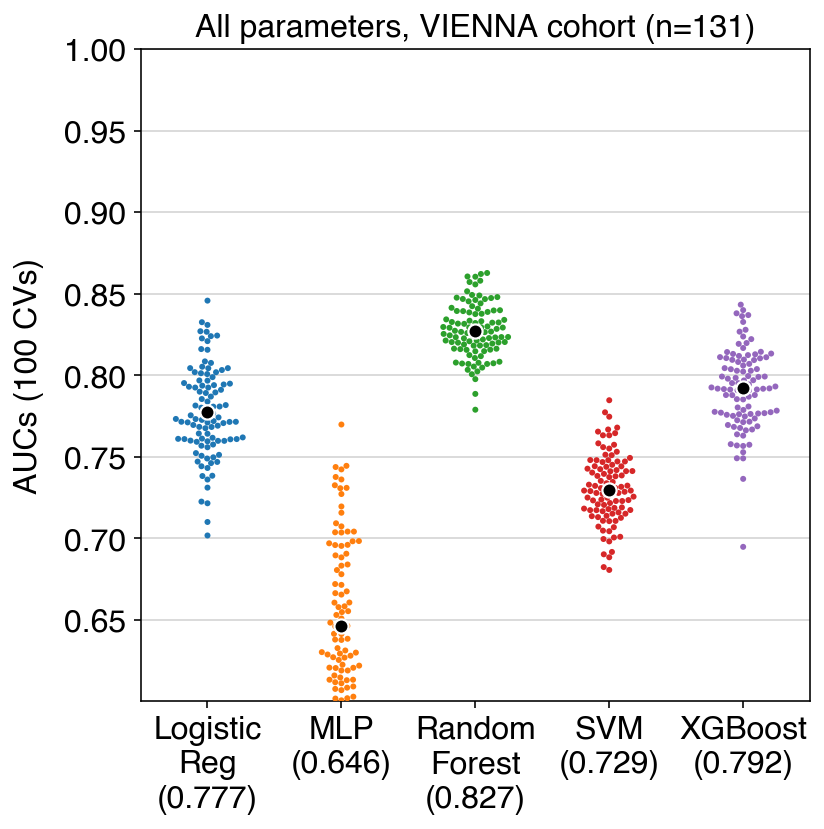

In [8]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### All standard workup parameters

In [9]:
# load table of variables with each assigned a label based on its availability (1=standard workup, 2 and 3 not widely available)
variables_metadata = pd.read_csv("../VICIS_selected_parameters_v3.txt", sep="|", header=None)
variables_metadata.columns = ["parameter", "code"]

# print standard workup parameters
variables_SW_list = list(variables_metadata[variables_metadata.code == 1]["parameter"])
variables_SW = [x for x in data.columns if x in variables_SW_list]
f"{len(variables_SW)=} " + ",".join(variables_SW)

'len(variables_SW)=52 SEX_Code,AGE,MELD-UNOS,BL_BMI,HR,SYS,DIA,MAP,ERY,HB,HKT,MCV,MCH,MCHC,PLT,WBC,Na,K,Cl,Ca,Ph,Mg,KREA,BUN,BILI,PROTEIN,ALB,CHE,AP,ASAT,ALAT,GGT,LDH,aPTT,FGEN,INR,TPZ%,D-Dim,TRIG,CHOL,GLUC,HDL,LDL,Fe,TF,TFS,FERRITIN,NH3,CRP,TSH,25(OH)D,proBNP'

In [10]:
cohort, variables, title = "VIENNA", variables_SW, "Standard workup parameters"

52 variables (SEX_Code, AGE, MELD-UNOS, BL_BMI, HR, SYS, DIA, MAP, ERY, HB, HKT, MCV, MCH, MCHC, PLT, WBC, Na, K, Cl, Ca, Ph, Mg, KREA, BUN, BILI, PROTEIN, ALB, CHE, AP, ASAT, ALAT, GGT, LDH, aPTT, FGEN, INR, TPZ%, D-Dim, TRIG, CHOL, GLUC, HDL, LDL, Fe, TF, TFS, FERRITIN, NH3, CRP, TSH, 25(OH)D, proBNP), VIENNA cohort(s), 131 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  *********************************************************************************************

,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.778332,0.007473,0.784314,0.007473
1,MLP,0.662950,0.010235,0.673203,0.010235
2,Random Forest,0.814734,0.006846,0.823529,0.006846
3,SVM,0.705777,0.008823,0.718954,0.008823
4,XGBoost,0.823765,0.007072,0.830065,0.007072


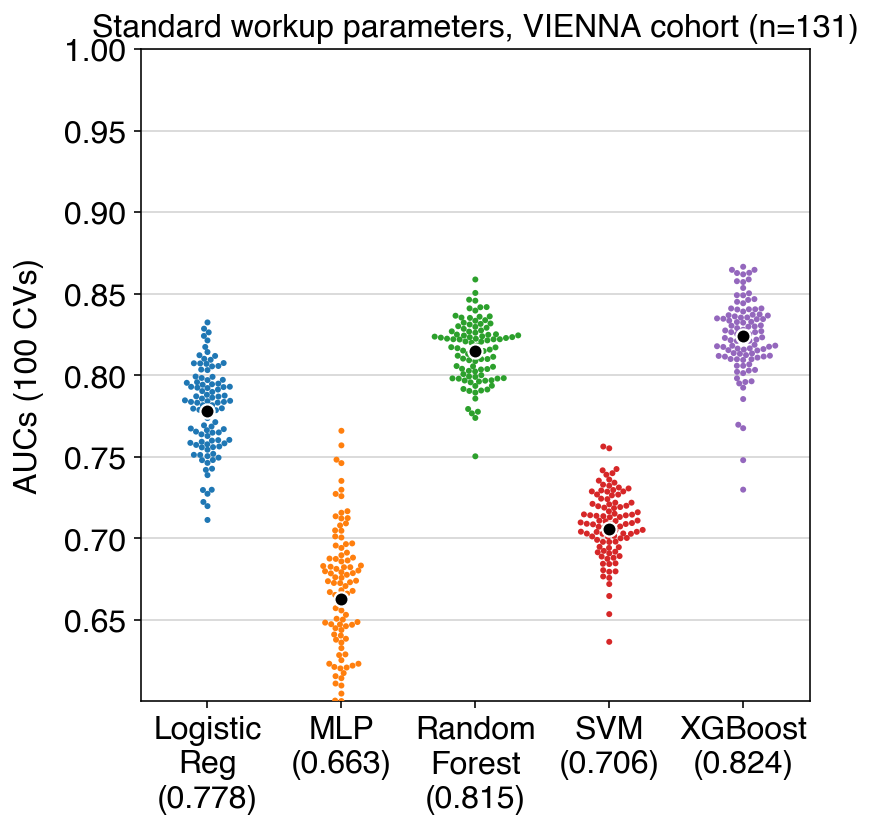

In [11]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-AP model (PLT, BILI, ELF, HISTAMINE, GGT)

In [12]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "ELF", "HISTAMINE", "GGT"], "5AP"

5 variables (PLT, BILI, ELF, HISTAMINE, GGT), VIENNA cohort(s), 131 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.888044,0.005237,0.895425,0.005237
1,MLP,0.765288,0.008604,0.771242,0.008604
2,Random Forest,0.831057,0.006672,0.836601,0.006672
3,SVM,0.752447,0.008252,0.758170,0.008252
4,XGBoost,0.805575,0.006818,0.810458,0.006818


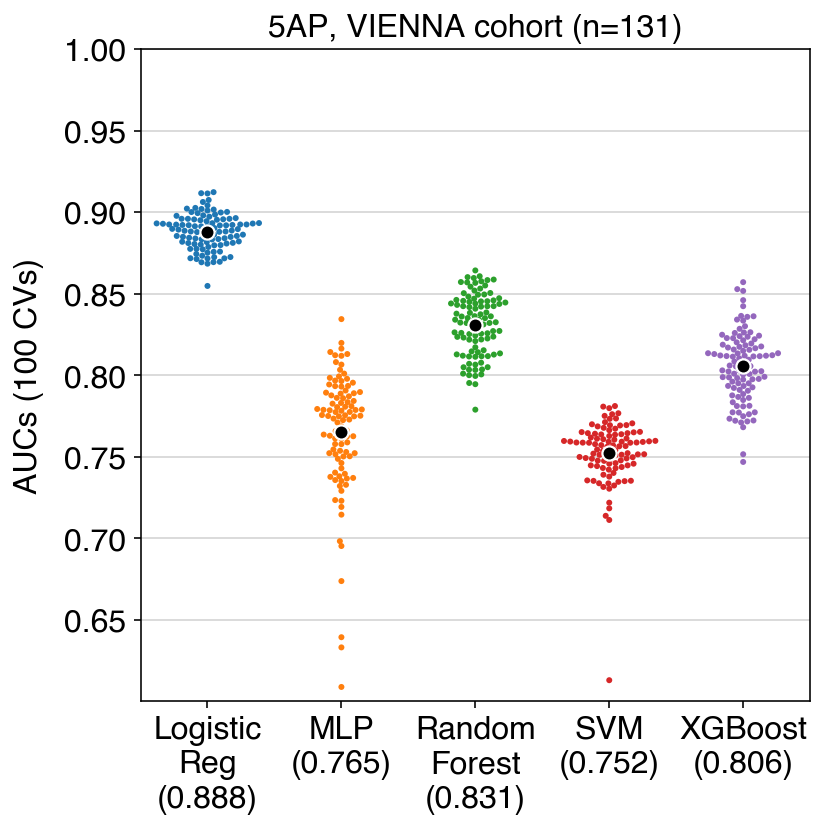

In [13]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-AP model (PLT, BILI, ELF)

In [14]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "ELF"], "3AP"

3 variables (PLT, BILI, ELF), VIENNA cohort(s), 131 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.879476,0.005535,0.885802,0.005535
1,MLP,0.783425,0.008635,0.790850,0.008635
2,Random Forest,0.828679,0.006622,0.830156,0.006622
3,SVM,0.717413,0.012968,0.738562,0.012968
4,XGBoost,0.809334,0.006870,0.815359,0.006870


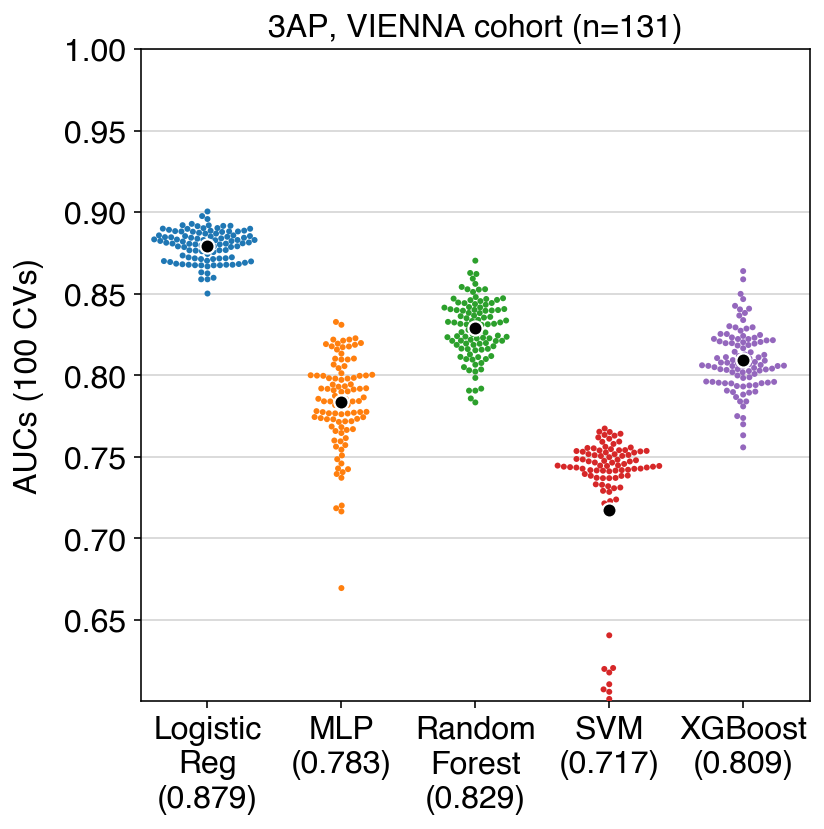

In [15]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)